In [94]:
import os
import seaborn as sb
sb.set(style="white")
sb.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import  accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression,LinearRegression
import pandas as pd
import numpy as np

In [95]:
#We have our data already consisting of train and test. 
#Most of data cleaning was done via excel.
#Let us load train data
train_data = pd.read_csv("B:/DATA Science/drivendata/train_values.csv")
train_data.head(10)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
5,ldukkw,1,normal,130,3,0,0,0,180,0.0,1,42,150,0
6,2gbyh9,2,reversible_defect,150,4,2,0,2,258,2.6,0,60,157,0
7,daa9kp,2,fixed_defect,150,4,1,0,2,276,0.6,1,57,112,1
8,3nwy2n,3,reversible_defect,170,4,0,0,2,326,3.4,1,59,140,1
9,1r508r,2,normal,120,3,0,0,0,219,1.6,0,50,158,0


In [96]:
#Lets load test data
# however our test data does not contain the target variable, which means we need create a n algorith that will
#be able to predict target variables based on the test data. Upon which our algorithm will be avaluated.
test_data = pd.read_csv("B:/DATA Science/drivendata/test_values.csv")
test_data.head(10)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1
5,kev1sk,2,normal,122,3,0,0,0,213,0.2,0,43,165,0
6,9n6let,3,normal,150,1,0,0,0,226,2.6,0,66,114,0
7,jxmtyg,2,reversible_defect,140,3,3,0,2,254,2.0,1,69,146,0
8,51s2ff,1,normal,138,4,0,0,2,271,0.0,1,59,182,0
9,wi9mcs,1,normal,138,3,0,0,2,257,0.0,1,47,156,0


In [97]:
#lets make quick check of our data.
print(list(train_data.columns))
train_data.describe()

['patient_id', 'slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels', 'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age', 'max_heart_rate_achieved', 'exercise_induced_angina']


,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


In [98]:
# the range of max seems to be OK. But we can still scale our data to ensuer there is o big variance 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#make copy of data
train_data_copy = train_data.copy(all)
train_data_copy.describe(include='all')

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180,180.000000,180,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
unique,180,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,5qfar3,NaN,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.550000,NaN,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,NaN,0.618838,NaN,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,NaN,1.000000,NaN,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,NaN,1.000000,NaN,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,NaN,1.000000,NaN,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,NaN,2.000000,NaN,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000


In [99]:
from sklearn import preprocessing
for column in train_data.columns:
    if train_data[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        train_data[column] = le.fit_transform(train_data[column])

In [100]:
#check for missing values in our data
#well it appears we do not have missing values. very easy right?
train_data.isnull().sum()


patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64

In [101]:
train_data.dtypes

patient_id                                int64
slope_of_peak_exercise_st_segment         int64
thal                                      int64
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
dtype: object

In [102]:
train_labels = pd.read_csv("B:/DATA Science/drivendata/train_labels.csv")
train_labels.head(5)

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [103]:
train_data.dtypes
train_data['oldpeak_eq_st_depression'] = train_data['oldpeak_eq_st_depression'].astype('int')
train_labels['heart_disease_present'] = train_labels['heart_disease_present'].astype('category')
train_labels.dtypes

patient_id                 object
heart_disease_present    category
dtype: object

In [104]:
#we convert heart_disease_presence into a categorical variable
#train_data['heart_disease_present']= train_data['heart_disease_present'].astype('category').head(5)
train_data['resting_blood_pressure'].value_counts()

130    26
140    22
120    21
110    11
150    10
160     9
112     8
128     8
125     7
108     5
124     5
135     4
118     4
145     4
132     3
180     3
138     3
134     2
178     2
126     2
142     2
100     2
152     2
136     2
115     2
172     1
102     1
105     1
106     1
117     1
170     1
156     1
155     1
122     1
144     1
94      1
Name: resting_blood_pressure, dtype: int64

In [105]:
#for the give frequency we have valuea that have frequency of 1 as unique values
train_data['resting_blood_pressure'].unique()

array([128, 110, 125, 152, 178, 130, 150, 170, 120, 140, 138, 144, 136,
       160, 108, 106, 156, 180, 112, 122, 124, 135, 105, 115, 126, 172,
       145, 118, 134, 100, 155, 132, 102,  94, 117, 142], dtype=int64)

In [110]:
#we have four types of chest pains with chest pain 4 being the most common
train_labels = train_labels.drop(['patient_id'], axis=1)
train_data['chest_pain_type'].value_counts()

4    82
3    57
2    28
1    13
Name: chest_pain_type, dtype: int64

In [107]:
# we are about to get messy with ML wo let get our target value
train_labels = pd.read_csv("B:/DATA Science/drivendata/train_labels.csv")
train_labels.head(10)
train_labels['heart_disease_present'].value_counts()

0    100
1     80
Name: heart_disease_present, dtype: int64

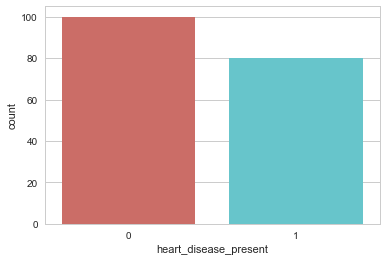

In [108]:
sb.countplot(x='heart_disease_present',data=train_labels, palette='hls')
plt.show()


In [111]:
#patients with chest pain type 4 are most likely to experience heart attack
#we had already factored logistic regression  so..

x = train_data
y =train_labels

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state =0)
lrm = LogisticRegression()
lrm.fit(x_train, y_train)
#x_train.shape, y_train.shape



C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [113]:

predict = lrm.predict(x_test)
predict

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [114]:
#Lets check the accuracy of our model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict)

0.7407407407407407